<a href="https://colab.research.google.com/github/Clonlyfan/Statistics-and-more/blob/main/Dimention_Reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while **preserving as much of the original variance** as possible.

**The PCA process involves these steps**:
*   Standardization
*   Covariance Matrix Computation
*   Eigendecomposition
*   Variance Ranking
Limitations

**Assumes linear relationships**
*   Assumes linear relationships
*   Can lose interpretability of original features
*   Sensitive to outliers

 ***If you were to apply PCA to the entire dataset before splitting, you would inadvertently leak information from the test set into your model. The principal components would be influenced by patterns in the test data, which violates the principle that test data should remain completely unseen during model development.
This same principle applies to other preprocessing steps like standardization or normalization - always fit these transformations on training data only, then apply them to both sets.***



Explained Variance Ratio:
Principal Component 1: 76.29%
Principal Component 2: 22.42%
Principal Component 3: 1.16%
Principal Component 4: 0.14%


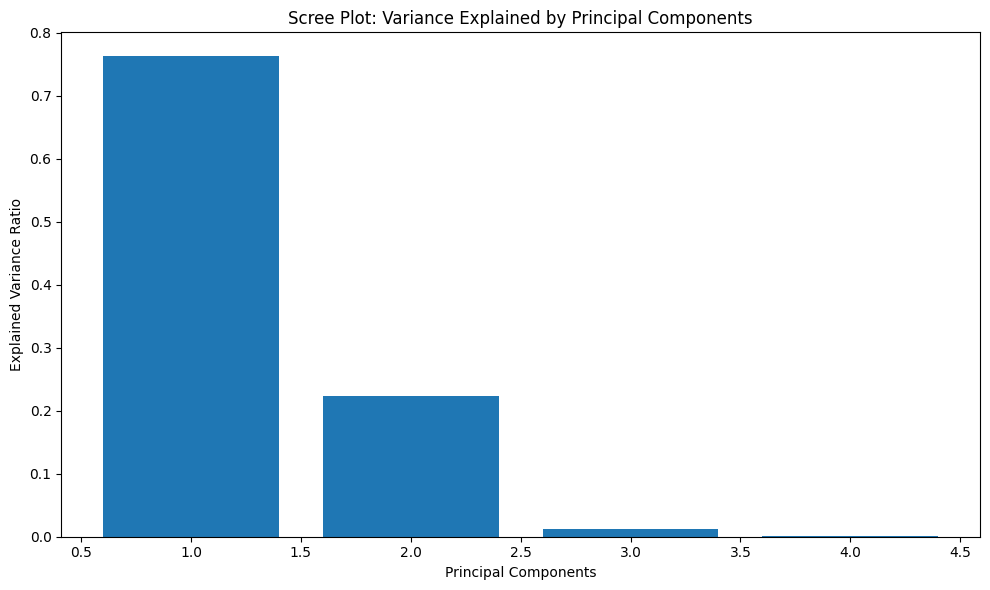


Component Loadings:
                           PC1       PC2       PC3       PC4
Study_Hours           0.569127  0.047592 -0.379761  0.727744
Sleep_Hours          -0.229652  0.967071 -0.080806  0.074187
Lecture_Attendance    0.553155  0.200728  0.808178 -0.023984
Previous_Exam_Scores  0.563360  0.149053 -0.442832 -0.681402


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example Dataset: Student Performance Metrics
# Features: Study Hours, Sleep Hours, Lecture Attendance, Previous Exam Scores
data = {
    'Study_Hours': [5, 3, 6, 4, 7, 2, 8, 5, 4, 6],
    'Sleep_Hours': [7, 6, 5, 8, 6, 5, 4, 7, 6, 5],
    'Lecture_Attendance': [90, 70, 85, 75, 95, 60, 100, 80, 70, 85],
    'Previous_Exam_Scores': [75, 60, 80, 70, 85, 55, 90, 75, 65, 80]
}

# Create DataFrame
df = pd.DataFrame(data)

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_

# Print key PCA results
print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {ratio * 100:.2f}%")

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Principal Components')
plt.tight_layout()
plt.show()

# Loadings (how original features contribute to principal components)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)
print("\nComponent Loadings:")
print(loadings)